# Evolution Plots 
In this notebook we investigate two things: 

(1) How the effective ridge $\tilde{\lambda}$ evolves as a function of $\gamma$ and $\lambda$ for various eigenvalue spectrums $D$.

(2) Convergence of the eigenvalues of the $\mathbb{E}[A_\lambda]$ to $\frac{d_i}{d_i +\tilde{\lambda}}$ as $P$ increases.

In [1]:
from utils import *

# helper functions to make the plots
def make_plot1(E, P_lst, lambd_lst):
    # plots the evolution of the effective ridge 
    # as a funct. of \gamma for various ridge
    cnt = 0.5;
    for i in range(lambd_lst.size):
        my_str = '$\lambda=%.4f$' % (lambd_lst[i])
        plt.plot(P_lst/N, E[i,:], color=[0, 0.2*cnt, 0.4*cnt], label = my_str)
        plt.axhline(y = lambd_lst[i], color=[0, 0.2*cnt, 0.4*cnt], linestyle='dashed', alpha = 0.5)
        cnt += 0.5

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(0,8)
    plt.legend(loc="upper right")
    plt.axvline(x=1, color= 'red', linestyle='dashed', alpha = 0.5)
    plt.xlabel('$\gamma$', fontsize=16)
    plt.ylabel('$\~{\lambda}$', fontsize=16)
    plt.show()
    #plt.savefig('eff_ridge_pol.pdf', dip = 500, bbox_inches= 'tight') 
    
def make_plot2(E_der, P_lst, lambd_lst):   
    # plots the evolution of the derivative of the effective ridge 
    # as a funct. of \gamma for various ridge
    cnt = 0.5;
    for i in range(lambd_lst.size):
        my_str = '$\lambda=%.4f$' % (lambd_lst[i])
        plt.plot(P_lst/N, E_der[i,:], color=[0, 0.2*cnt, 0.4*cnt], label=my_str)
        cnt += 0.5

    plt.xscale('log')
    plt.legend(loc="upper right")
    plt.ylim(0.5,6.5)
    plt.axhline(y = 1, color = 'black', linestyle='dashed', alpha = 0.5)
    plt.axvline(x = 1, color = 'red', linestyle='dashed', alpha = 0.5)
    plt.xlabel('$\gamma$', fontsize=16)
    plt.ylabel('der-$\~{\lambda}$', fontsize=16)
    plt.show()
    #plt.savefig('der_eff_ridge_exp.pdf', dip = 500, bbox_inches= 'tight') 
    
def make_plot3(E, P_lst, lambd_lst):   
    # plots the evolution of the effective ridge
    # as a funct. of the original ridge \lambda for various P
    cnt = 0.5;
    for i in range(P_lst.size):
        if(np.mod(P_lst[i],N) == 0):
            my_str = '$\gamma=%d$' % (P_lst[i]/N)
        else:
            my_str = '$\gamma=%.1f$' % (P_lst[i]/N)
        plt.plot(lambd_lst, E[:,i], color=[0, 0.2*cnt, 0.4*cnt], label = my_str)
        cnt += 0.5

    plt.xlim(0,0.4)
    plt.ylim(0,0.4)
    plt.legend(loc="lower right")
    plt.xlabel('$\lambda$', fontsize=16)
    plt.ylabel('$\~{\lambda}$', fontsize=16)
    plt.show()
    #plt.savefig('eff_ridge_exp2.pdf', dip = 500, bbox_inches= 'tight') 
    
def make_plot4(P_lst, lambd, N_lst):  
    lambd_lst = np.array([lambd])
    cnt = 1
    plt.axvline(x = 1, color = 'red', linestyle='dashed', alpha = 0.5)
    plt.axhline(y = lambd_lst[0], color = 'black', linestyle='dashed', alpha = 0.5)
    for N in N_lst:
        D = make_eig_spect(N, exp=True) 
        P_lst = np.concatenate((np.linspace(1, N, N), np.floor(np.linspace(N+1, N*100, 800))))

        E, E_der = calc_eff_ridges(D, lambd_lst, P_lst) 

        my_str = '$N=%d$' % (N)
        plt.plot(P_lst / N, E[0,:], color=[0, 0.2*cnt, 0.4*cnt], label = my_str)
        plt.xscale('log')
        cnt += 0.5

    plt.legend()
    plt.xlabel('$\gamma$', fontsize=16)
    plt.ylabel('$\~{\lambda}$', fontsize=16)
    plt.show()
    #plt.savefig('eff_ridge_exp_r2.pdf', dip = 500, bbox_inches= 'tight')

Part 1. Evolution of of $\tilde{\lambda}$:

You can choose exponential or polynomial decay with various speeds for the eigenvalue spectrum $D$ below:

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


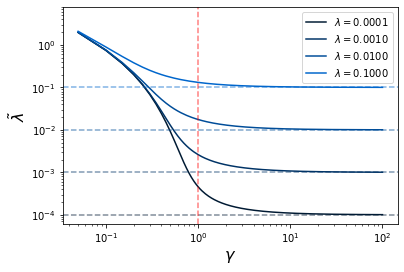

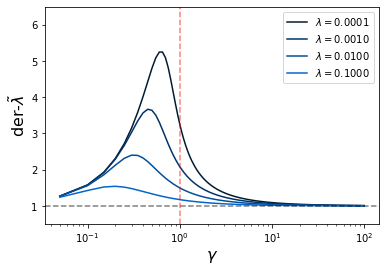

In [2]:
N = 20 
D = make_eig_spect(N, exp=True, exp_decay=0.5, pol_decay=1) # choose the eigenvalue spectrum

lambd_lst = np.array([1e-4, 1e-3, 1e-2, 1e-1]) # choose ridge

P_lst = np.linspace(1,2000,2000) 
E, E_der = calc_eff_ridges(D, lambd_lst, P_lst) 

make_plot1(E, P_lst, lambd_lst) 
make_plot2(E_der, P_lst, lambd_lst)

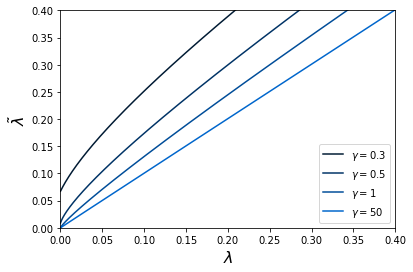

In [3]:
P_lst = np.array([6,10,20,1000]) # choose P

lambd_lst = np.linspace(0,0.4,1000)

E, E_der = calc_eff_ridges(D, lambd_lst, P_lst) 

make_plot3(E, P_lst, lambd_lst)

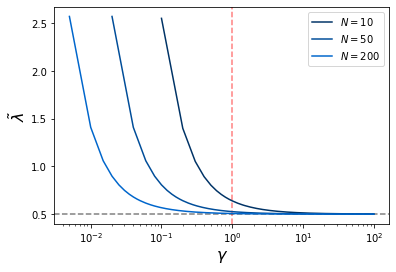

In [4]:
lambd = 0.5 # choose ridge

N_lst = [10, 50, 200]

make_plot4(P_lst, lambd, N_lst)

Part 2. Eigenvalues of $\mathbb{E}[A_\lambda]$:

(0.5, 10.5)

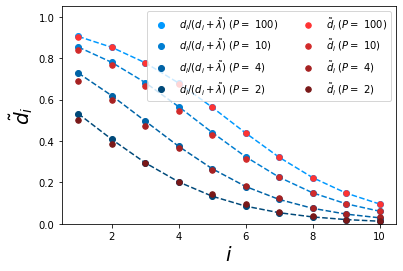

In [5]:
N = 10

D = make_eig_spect(N, exp=True)
lambd = 1e-1; 

#my_str = 'exp-ridge-%.4f.pdf' % (lambd)

P_list = [100, 10, 4, 2]

cnt = 2;
for P in P_list:
    eff_rid, x = solve_eff_ridge(D, P, lambd)
    C = calc_kernel_eigs(D, eff_rid)
    str_label =  '$d_i / (d_i + \~{\lambda})$ ($P =$ %d)' % (P)
    plt.plot(np.linspace(1, N, N), C, 'o', color = [0, 0.3*cnt, 0.5*cnt], markersize = 6, label=str_label)
    plt.plot(np.linspace(1, N, N), C, linestyle='dashed', color = [0, 0.3*cnt, 0.5*cnt])
    #plt.errorbar(np.linspace(1, N, N), Am, As, color= [0.4*cnt, 0, 0], fmt='o')
    cnt -= 0.35

cnt = 2;
for P in P_list:
    str_label = '$\~{d}_i$ ($P =$ %d)' % (P)
    Am, As = calc_emp_eigs(D, P, lambd)
    plt.plot(np.linspace(1, N, N), Am, 'o', color= [0.5*cnt, 0.1*cnt, 0.1*cnt], markersize = 5.5, label=str_label)
    cnt -= 0.35

#plt.legend(loc='upper left', bbox_to_anchor=(-0.3,0.95))
plt.legend(loc='upper right', ncol = 2)
plt.xlabel('$i$', fontsize=20)
plt.ylabel('$\~{d}_i$', fontsize=20)
plt.ylim(0, 1.05)
plt.xlim(0.5, N+0.5)
#plt.savefig(my_str, dip = 500, bbox_inches= 'tight') 